<a href="https://colab.research.google.com/github/Diegohernando05/DIEGO-HERNANDO-ARANGO-RIOS/blob/main/2_EntrenamientoyEvaluacion_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("dataset.csv")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


A continuación se crea el conjunto de entrada x y el de salida Y correspondiente al Target y se dividen los datos en conjuntos de entrenamiento y testeo:

In [ ]:
#Importamos librerias
from sklearn.model_selection import train_test_split

In [ ]:
X = df.values[:,:-1]
y = df["Target"].values
print (X.shape, y.shape)

(4424, 34) (4424,)


In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.2)
print (Xtr.shape, ytr.shape, Xts.shape, yts.shape)

(3539, 34) (3539,) (885, 34) (885,)


En primer lugar apliquemos un modelo de Regresion Logistica ya que nuestra salida es categorica:

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtr, ytr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("Accuracy del modelo: \n Entrenamiento: %.4f y Testeo: %.4f "%(lr.score(Xtr, ytr), lr.score(Xts, yts)))

Accuracy del modelo: 
 Entrenamiento: 0.7824 y Testeo: 0.7424 


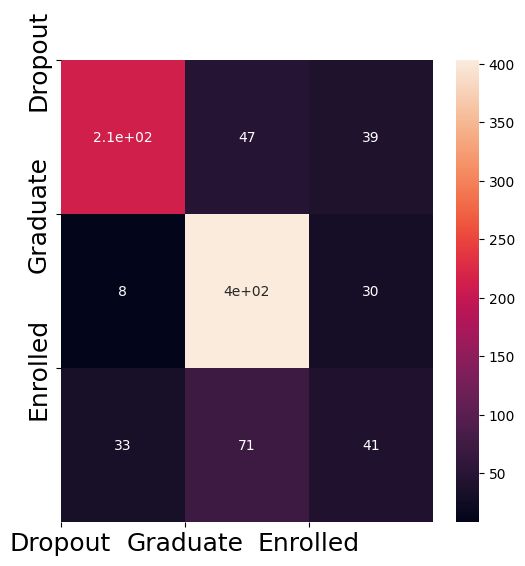

In [ ]:
from sklearn import metrics
predicted=lr.predict(Xts)
confusion_matrix = metrics.confusion_matrix(yts, predicted,labels=['Dropout', 'Graduate', 'Enrolled'])
fig, ax = plt.subplots(figsize=(6,6))
im = sns.heatmap(confusion_matrix,annot=True)

p=['Dropout', 'Graduate', 'Enrolled']

ax.set_xticks(np.arange(len(p)), labels=k,fontsize=18)
ax.set_yticks(np.arange(len(p)), labels=p,fontsize=18)



Verfiquemos que si esta bien dividio el conjunto de datos de tal modo que si haya cantidad suficiente

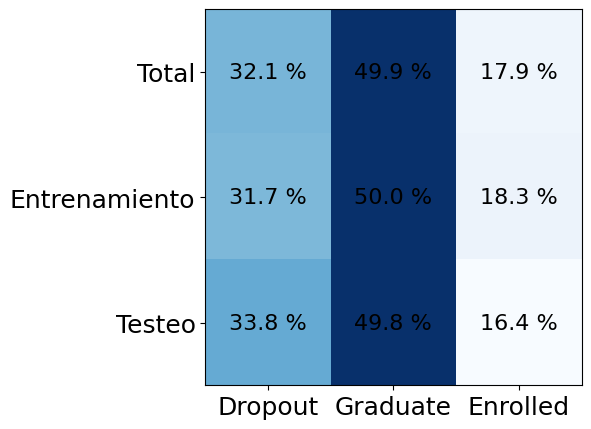

In [ ]:
import collections
M=np.zeros((3,3))
a=['Dropout', 'Graduate', 'Enrolled']
for j,i in enumerate([y,ytr,yts]):
  count=collections.Counter(i)
  for k in range(3):
    M[j,k]=count[a[k]]*100/len(i)
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(M,cmap="Blues")

p=["Total","Entrenamiento","Testeo"]
k=a

ax.set_xticks(np.arange(len(k)), labels=k,fontsize=18)
ax.set_yticks(np.arange(len(p)), labels=p,fontsize=18)


for i in range(len(p)):
    for j in range(len(k)):
        text = ax.text(j, i, str(round(M[i,j],1))+" %",
                       ha="center", va="center", color="k",fontsize=16)

fig.tight_layout()
plt.show()

Como podemos observar la mayor falla se encuentra en los estudiantes matriculados, ya que su cantidad es muy pequeña respecto a lo conserniente a graduados o que han abandonado.

Ahora evaluemos otro modelo, usemos un arbol de decisión y veamos si este mejora el rendimiento:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DR = DecisionTreeClassifier()
DR.fit(Xtr, ytr)
print("Accuracy del modelo: \n Entrenamiento: %.4f y Testeo: %.4f "%(DR.score(Xtr, ytr), DR.score(Xts, yts)))

Accuracy del modelo: 
 Entrenamiento: 1.0000 y Testeo: 0.6723 


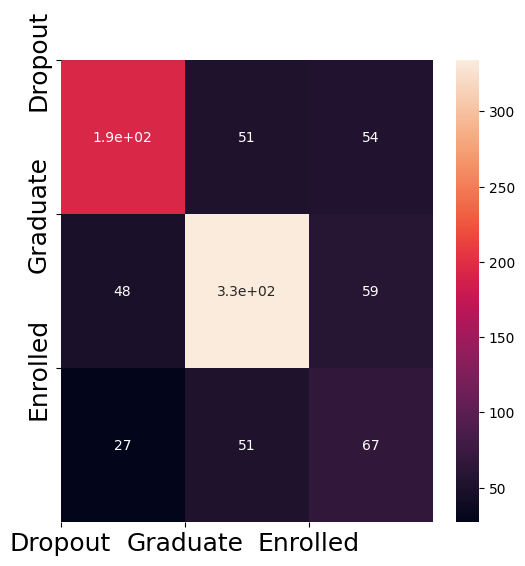

In [ ]:
predicted=DR.predict(Xts)
confusion_matrix = metrics.confusion_matrix(yts, predicted,labels=['Dropout', 'Graduate', 'Enrolled'])
fig, ax = plt.subplots(figsize=(6,6))
im = sns.heatmap(confusion_matrix,annot=True)

p=['Dropout', 'Graduate', 'Enrolled']

ax.set_xticks(np.arange(len(p)), labels=k,fontsize=18)
ax.set_yticks(np.arange(len(p)), labels=p,fontsize=18)

de aquí observamos que el modelo aprende de forma perfeta el conjunto de entrenamiento, pero falla para el de testeo, es decir que se presenta un sobre ajuste, por lo cual es importante incluir una validación cruzada que nos permita eegir cual es el mejor conjunto de testeo que brinde un mejor entrenameinto:

In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit
estimator1 = DecisionTreeClassifier(max_depth=5)
z1 = cross_validate(estimator1, X, y, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=10, test_size=0.2))

In [ ]:
z1

{'fit_time': array([0.03953791, 0.03575659, 0.03452039, 0.04427123, 0.03558969,
        0.04256415, 0.04503298, 0.03854823, 0.04210067, 0.04857302]),
 'score_time': array([0.00548792, 0.00552988, 0.00537658, 0.00420427, 0.00541353,
        0.00564766, 0.00762439, 0.00569463, 0.00559163, 0.00583243]),
 'estimator': [DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=5)],
 'test_score': array([0.74124294, 0.74689266, 0.74689266, 0.74915254, 0.74463277,
        0.73559322, 0.71525424, 0.77853107, 0.73785311, 0.74915254]),
 'train_score': array([0.76801356, 0.76547047, 0.77168692, 0.77423001, 0.77451257,
        0.76038429, 0.76123199, 0.7668833 , 0.77931619, 0.7

In [ ]:
def report_cv_score(z):
    print ("test score   %.3f (±%.4f) with %d splits"%(np.mean(z["test_score"]), np.std(z["test_score"]), len(z["test_score"])))
    print ("train score  %.3f (±%.4f) with %d splits"%(np.mean(z["train_score"]), np.std(z["train_score"]), len(z["train_score"])))

report_cv_score(z1)

test score   0.745 (±0.0148) with 10 splits
train score  0.769 (±0.0057) with 10 splits


De aquí observamos que en general este modelo no supera los resultados del anterior a pesar de usar cross validation para hallar el mejor conjunto.

Ahora probemos con un modelo de RandomForest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimator2 = RandomForestClassifier(max_depth=10)
z2 = cross_validate(estimator1, X, y, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=10, test_size=0.2))
report_cv_score(z2)

test score   0.750 (±0.0113) with 10 splits
train score  0.766 (±0.0050) with 10 splits


In [ ]:
RF = RandomForestClassifier()
RF.fit(Xtr, ytr)
print("Accuracy del modelo: \n Entrenamiento: %.4f y Testeo: %.4f "%(RF.score(Xtr, ytr), RF.score(Xts, yts)))

Accuracy del modelo: 
 Entrenamiento: 1.0000 y Testeo: 0.7525 


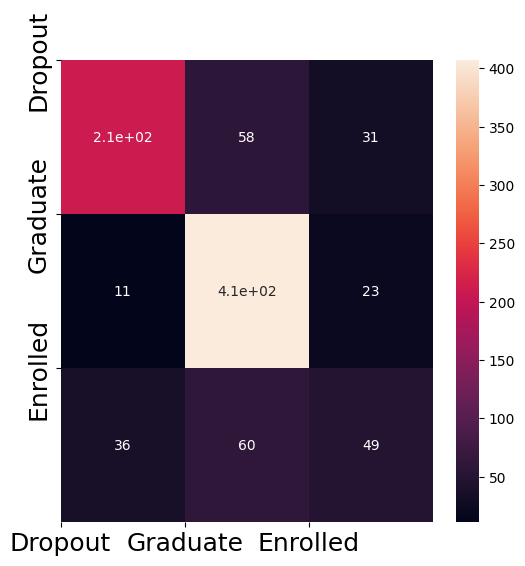

In [ ]:
predicted=RF.predict(Xts)
confusion_matrix = metrics.confusion_matrix(yts, predicted,labels=['Dropout', 'Graduate', 'Enrolled'])
fig, ax = plt.subplots(figsize=(6,6))
im = sns.heatmap(confusion_matrix,annot=True)

p=['Dropout', 'Graduate', 'Enrolled']

ax.set_xticks(np.arange(len(p)), labels=k,fontsize=18)
ax.set_yticks(np.arange(len(p)), labels=p,fontsize=18)

Por último proponemos un modelo de red neuronal haciendo uso de tensorflow:


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(64, input_dim=34, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 64)                2240      
                                                                 
 dense_79 (Dense)            (None, 128)               8320      
                                                                 
 dense_80 (Dense)            (None, 64)                8256      
                                                                 
 dense_81 (Dense)            (None, 32)                2080      
                                                                 
 dense_82 (Dense)            (None, 3)                 99        
                                                                 
Total params: 20995 (82.01 KB)
Trainable params: 20995 (82.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Dividir entre entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de testeo en validación y testeo
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

Para poder entrenar, necesitamos convertir las categorias array de números que indican la categoria a la cual pertenece, por lo cual usaremos la siguiente función:

In [ ]:
def conv_y(yp):
  if(yp=='Dropout'):
    return [1,0,0]
  elif(yp=='Graduate'):
    return [0,1,0]
  elif(yp=='Enrolled'):
    return [0,0,1]
y_train_conv=[conv_y(i) for i in y_train]
y_val_conv=[conv_y(i) for i in y_val]
y_test_conv=[conv_y(i) for i in y_test]

In [ ]:
history=model.fit(np.array(X_train),np.array(y_train_conv), epochs=50, batch_size=1,validation_data=(np.array(X_val), np.array(y_val_conv)))

Epoch 1/50
3539/3539 [==============================] - 11s 3ms/step - loss: 0.6540 - accuracy: 0.7420 - val_loss: 0.5939 - val_accuracy: 0.7873
Epoch 2/50
3539/3539 [==============================] - 9s 3ms/step - loss: 0.5793 - accuracy: 0.7641 - val_loss: 0.5882 - val_accuracy: 0.7896
Epoch 3/50
3539/3539 [==============================] - 10s 3ms/step - loss: 0.5518 - accuracy: 0.7850 - val_loss: 0.5659 - val_accuracy: 0.7828
Epoch 4/50
3539/3539 [==============================] - 10s 3ms/step - loss: 0.5304 - accuracy: 0.7855 - val_loss: 0.5756 - val_accuracy: 0.7692
Epoch 5/50
3539/3539 [==============================] - 9s 3ms/step - loss: 0.5100 - accuracy: 0.7940 - val_loss: 0.5970 - val_accuracy: 0.7692
Epoch 6/50
3539/3539 [==============================] - 9s 2ms/step - loss: 0.4945 - accuracy: 0.8005 - val_loss: 0.6420 - val_accuracy: 0.7783
Epoch 7/50
3539/3539 [==============================] - 10s 3ms/step - loss: 0.4724 - accuracy: 0.8107 - val_loss: 0.6282 - val_accur

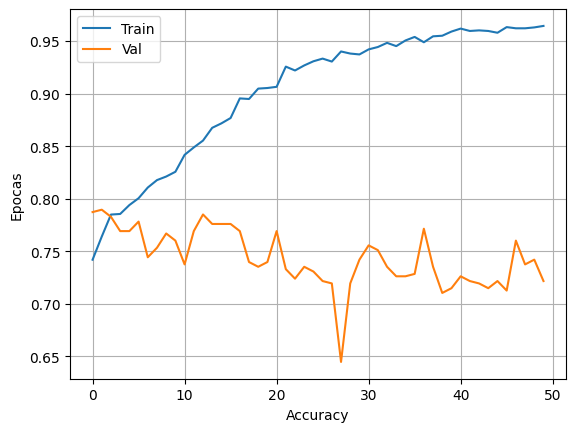

In [ ]:
plt.plot(np.array(model.history.history['accuracy']), label='Train')
plt.plot(np.array(model.history.history['val_accuracy']),label='Val')
plt.legend()
plt.xlabel("Accuracy")
plt.ylabel("Epocas")
plt.grid()
plt.show()

In [ ]:
target=['Dropout', 'Graduate', 'Enrolled']
def conv_Categorical(yp):
  ind=np.where(np.max(yp)==yp)[0][0]
  return target[ind]

pred=model.predict(Xts)
conv_Categorical(pred[0])
y_pred_conv=[conv_Categorical(i) for i in pred]

28/28 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(yts, y_pred_conv)
print("Accuracy del Testeo: ",accuracy)

Accuracy del Testeo:  0.919774011299435


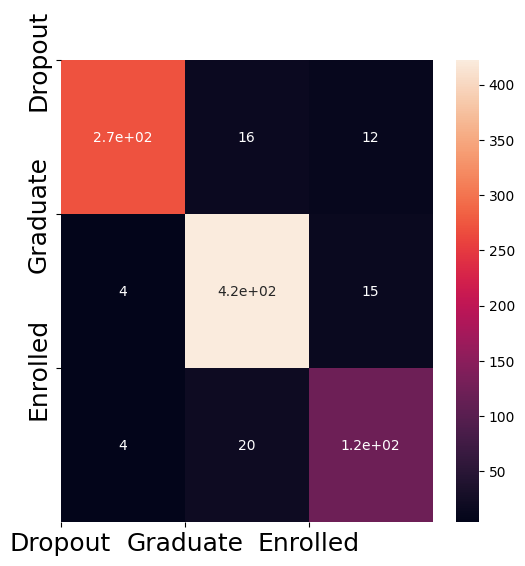

In [ ]:
confusion_matrix = metrics.confusion_matrix(yts, y_pred_conv,labels=['Dropout', 'Graduate', 'Enrolled'])
fig, ax = plt.subplots(figsize=(6,6))
im = sns.heatmap(confusion_matrix,annot=True)

p=['Dropout', 'Graduate', 'Enrolled']

ax.set_xticks(np.arange(len(p)), labels=k,fontsize=18)
ax.set_yticks(np.arange(len(p)), labels=p,fontsize=18)